In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
import matplotlib as mt
mt.rcParams['font.family'] = 'Malgun Gothic'

C:\Users\ohi02\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# EDA 분석

In [3]:
data = pd.read_csv('경기도 수원시_지역화폐 결제 정보_20201211.csv', encoding='CP949')
data.head()

,기준년월,시군구명,읍면동명,성별,연령대,업종명,결제건수,결제금액,데이터기준일자
0,2020-11,권선구,고색동,남,10대,레져업소,20,106900,2020-12-11
1,2020-11,권선구,고색동,남,10대,보건위생,3,29000,2020-12-11
2,2020-11,권선구,고색동,남,10대,서적문구,1,5600,2020-12-11
3,2020-11,권선구,고색동,남,10대,약국,1,13600,2020-12-11
4,2020-11,권선구,고색동,남,10대,유통업영리,70,2160910,2020-12-11


## 1. 탐색적 데이터 분석: 데이터의 출처와 주제에 대해 이해
- 데이터 출처ㅣ 공공데이터 포털, 경기도 수원시 지역화폐 결제 정보(https://www.data.go.kr/data/15075618/fileData.do)
- 2019년 4월부터 2020년 11월까지의 지역화폐 결제 데이터를 담고 있음.

## 2. 탐색적 데이터 분석: 데이터의 크기 확인

In [4]:
data.tail()

,기준년월,시군구명,읍면동명,성별,연령대,업종명,결제건수,결제금액,데이터기준일자
128645,2019-04,팔달구,화서동,여,60대이상,약국,2,17900,2020-12-11
128646,2019-04,팔달구,화서동,여,60대이상,유통업영리,3,27690,2020-12-11
128647,2019-04,팔달구,화서동,여,60대이상,음료식품,2,12000,2020-12-11
128648,2019-04,팔달구,화서동,여,60대이상,의원,4,72900,2020-12-11
128649,2019-04,팔달구,화서동,여,60대이상,일반·휴게음식,6,81500,2020-12-11


In [5]:
data.shape

(128650, 9)

In [6]:
data.info

<bound method DataFrame.info of            기준년월 시군구명 읍면동명 성별    연령대      업종명  결제건수     결제금액     데이터기준일자
0       2020-11  권선구  고색동  남    10대     레져업소    20   106900  2020-12-11
1       2020-11  권선구  고색동  남    10대     보건위생     3    29000  2020-12-11
2       2020-11  권선구  고색동  남    10대     서적문구     1     5600  2020-12-11
3       2020-11  권선구  고색동  남    10대       약국     1    13600  2020-12-11
4       2020-11  권선구  고색동  남    10대    유통업영리    70  2160910  2020-12-11
...         ...  ...  ... ..    ...      ...   ...      ...         ...
128645  2019-04  팔달구  화서동  여  60대이상       약국     2    17900  2020-12-11
128646  2019-04  팔달구  화서동  여  60대이상    유통업영리     3    27690  2020-12-11
128647  2019-04  팔달구  화서동  여  60대이상     음료식품     2    12000  2020-12-11
128648  2019-04  팔달구  화서동  여  60대이상       의원     4    72900  2020-12-11
128649  2019-04  팔달구  화서동  여  60대이상  일반·휴게음식     6    81500  2020-12-11

[128650 rows x 9 columns]>

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128650 entries, 0 to 128649
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   기준년월     128650 non-null  object
 1   시군구명     128650 non-null  object
 2   읍면동명     128650 non-null  object
 3   성별       128650 non-null  object
 4   연령대      128650 non-null  object
 5   업종명      128650 non-null  object
 6   결제건수     128650 non-null  int64 
 7   결제금액     128650 non-null  int64 
 8   데이터기준일자  128650 non-null  object
dtypes: int64(2), object(7)
memory usage: 8.8+ MB


## 3. 탐색적 데이터 분석: 데이터 구성 요소(feature)의 속성(특징) 확인

#### 1. 각 column 이해하기.
raw data에는 다양한 column 이 있는 경우가 많고, 이 중에서 내가 사용할 column 에 대해서는 확실히 이해하고 있어야 한다.

In [8]:
data.columns

Index(['기준년월', '시군구명', '읍면동명', '성별', '연령대', '업종명', '결제건수', '결제금액', '데이터기준일자'], dtype='object')

In [9]:
data.describe(include = 'all')

,기준년월,시군구명,읍면동명,성별,연령대,업종명,결제건수,결제금액,데이터기준일자
count,128650,128650,128650,128650,128650,128650,128650.000000,1.286500e+05,128650
unique,20,4,56,2,7,34,NaN,NaN,1
top,2020-05,팔달구,영통동,여,20대,일반·휴게음식,NaN,NaN,2020-12-11
freq,10752,41216,4458,64568,28124,11951,NaN,NaN,128650
mean,NaN,NaN,NaN,NaN,NaN,NaN,91.834046,1.796752e+06,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,373.815329,6.812299e+06,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000e+01,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,4.700000e+04,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,2.169350e+05,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,32.000000,9.398275e+05,NaN


In [10]:
data.isna().sum()

기준년월       0
시군구명       0
읍면동명       0
성별         0
연령대        0
업종명        0
결제건수       0
결제금액       0
데이터기준일자    0
dtype: int64

In [13]:
#data.dropna(subset = ['데이터기준일자'],how='all')  # 아무것도 안변함

In [11]:
df = data.drop('데이터기준일자', axis=1)
df.head()

,기준년월,시군구명,읍면동명,성별,연령대,업종명,결제건수,결제금액
0,2020-11,권선구,고색동,남,10대,레져업소,20,106900
1,2020-11,권선구,고색동,남,10대,보건위생,3,29000
2,2020-11,권선구,고색동,남,10대,서적문구,1,5600
3,2020-11,권선구,고색동,남,10대,약국,1,13600
4,2020-11,권선구,고색동,남,10대,유통업영리,70,2160910


In [12]:
#중복데이터 검사. 결과 없음
for row in df.duplicated():
    if row == True:
        print(row)

In [13]:
df.corr()  # type가 int인것은 두 feature뿐. 상관계수 높은것은 당연..

,결제건수,결제금액
결제건수,1.000000,0.808201
결제금액,0.808201,1.000000


In [16]:
# %matplotlib inline
# plt.matshow(df.corr())

In [444]:
# %matplotlib qt
# sns.heatmap(df.corr(), cbar = True, annot = True,  annot_kws = {'size' : 20}, square = False, cmap = 'Blues') #cbar은 범례, annot은 상관계수

In [14]:
df.기준년월.value_counts()

2020-05    10752
2020-06    10267
2020-10     9641
2020-07     9500
2020-11     9288
2020-09     9247
2020-08     8791
2020-04     8529
2020-03     5676
2020-01     4947
2019-12     4933
2020-02     4789
2019-10     4754
2019-11     4650
2019-08     4523
2019-09     4408
2019-06     4237
2019-07     4198
2019-05     3994
2019-04     1526
Name: 기준년월, dtype: int64

해당 데이터는 각 결제데이터마다 1 이상의 '결제건수'를 갖고 있기 때문에 value_counts의 결과는 결제row데이터의 갯수일뿐, 그룹당 모든 결제건수를 의미하지 않음.

In [15]:
df.연령대.value_counts()

20대      28124
40대      26176
30대      25509
50대      23453
60대이상    16436
10대       8638
10세미만      314
Name: 연령대, dtype: int64

In [16]:
df.시군구명.value_counts()

팔달구    41216
권선구    35561
장안구    28173
영통구    23700
Name: 시군구명, dtype: int64

###### column 정제.

In [17]:
df['기준년월'] = df['기준년월'].str.split('-').str.join('')

In [18]:
df.기준년월 = df.기준년월.astype('int')
df.기준년월

0         202011
1         202011
2         202011
3         202011
4         202011
           ...  
128645    201904
128646    201904
128647    201904
128648    201904
128649    201904
Name: 기준년월, Length: 128650, dtype: int32

In [19]:
df.head()

,기준년월,시군구명,읍면동명,성별,연령대,업종명,결제건수,결제금액
0,202011,권선구,고색동,남,10대,레져업소,20,106900
1,202011,권선구,고색동,남,10대,보건위생,3,29000
2,202011,권선구,고색동,남,10대,서적문구,1,5600
3,202011,권선구,고색동,남,10대,약국,1,13600
4,202011,권선구,고색동,남,10대,유통업영리,70,2160910


### column 추가하기: 파생변수 (건당 평균결제금액)

In [20]:
df['건당 평균결제금액'] = round(df['결제금액']/df['결제건수'],2)
df.head()

,기준년월,시군구명,읍면동명,성별,연령대,업종명,결제건수,결제금액,건당 평균결제금액
0,202011,권선구,고색동,남,10대,레져업소,20,106900,5345.00
1,202011,권선구,고색동,남,10대,보건위생,3,29000,9666.67
2,202011,권선구,고색동,남,10대,서적문구,1,5600,5600.00
3,202011,권선구,고색동,남,10대,약국,1,13600,13600.00
4,202011,권선구,고색동,남,10대,유통업영리,70,2160910,30870.14


### Grouping

In [22]:
df2 = df.groupby('연령대').sum()
df2 = df2.drop(['기준년월'],axis=1)
df2

,결제건수,결제금액,건당 평균결제금액
연령대,,,
10대,171604,3015095454,3.211117e+08
10세미만,1095,17786215,7.713243e+06
20대,3446492,53503709497,1.235258e+09
30대,2461197,51542609941,1.463699e+09
40대,3196420,73609329811,1.380514e+09
50대,1871319,36478551937,1.051656e+09
60대이상,666323,12985004530,6.242998e+08


In [23]:
df2.sort_values(by = '결제건수', ascending = False)

,결제건수,결제금액,건당 평균결제금액
연령대,,,
20대,3446492,53503709497,1.235258e+09
40대,3196420,73609329811,1.380514e+09
30대,2461197,51542609941,1.463699e+09
50대,1871319,36478551937,1.051656e+09
60대이상,666323,12985004530,6.242998e+08
10대,171604,3015095454,3.211117e+08
10세미만,1095,17786215,7.713243e+06


In [24]:
df2.sort_values(by = '결제금액', ascending= False)

,결제건수,결제금액,건당 평균결제금액
연령대,,,
40대,3196420,73609329811,1.380514e+09
20대,3446492,53503709497,1.235258e+09
30대,2461197,51542609941,1.463699e+09
50대,1871319,36478551937,1.051656e+09
60대이상,666323,12985004530,6.242998e+08
10대,171604,3015095454,3.211117e+08
10세미만,1095,17786215,7.713243e+06


In [ ]:
%matplotlib inline
plt.()

In [32]:
df.groupby(['기준년월','업종명']).count()

시군구명  읍면동명   성별  연령대  결제건수  결제금액  건당 평균결제금액
기준년월   업종명                                                 
201904 건강식품        5     5    5    5     5     5          5
       건축자재        3     3    3    3     3     3          3
       광학제품       13    13   13   13    13    13         13
       기타          2     2    2    2     2     2          2
       기타의료기관      4     4    4    4     4     4          4
...              ...   ...  ...  ...   ...   ...        ...
202011 전기제품      109   109  109  109   109   109        109
       주방용구       92    92   92   92    92    92         92
       직물        170   170  170  170   170   170        170
       학원        388   388  388  388   388   388        388
       회원제형태업소   262   262  262  262   262   262        262

[673 rows x 7 columns]

In [33]:
storetype_group = df.groupby(['업종명'])

In [107]:
storetype_df = storetype_group.count()
storetype_df['결제건수'].sort_values(ascending = False)
# 일반 휴게음식, 유통업, 음료식품, 보건위생, 약국, 의원 순으로 결제건수가 많음.

업종명
일반·휴게음식     11951
유통업영리       10356
음료식품         9541
보건위생         7766
약국           7666
의원           7159
레져업소         5911
신변잡화         5300
문화·취미        5107
의류           5075
수리서비스        4914
서적문구         4671
학원           4621
자동차정비·유지     3806
레져용품         3636
기타의료기관       3134
용역서비스        2876
회원제형태업소      2854
연료판매점        2777
광학제품         2427
건축자재         2326
건강식품         2303
직물           2174
기타           2162
사무통신         1553
숙박업          1277
주방용구         1101
전기제품         1099
가구            948
병원            716
농업            642
유통업비영리        561
자동차판매         161
여행             79
Name: 결제건수, dtype: int64

## boolean selection으로 row 선택하기¶
numpy에서와 동일한 방식으로 해당 조건에 맞는 row만 선택한다.

In [126]:
df[df['건당 평균결제금액'] == max(df['건당 평균결제금액'])]

,기준년월,시군구명,읍면동명,성별,연령대,업종명,결제건수,결제금액,건당 평균결제금액
28329,202008,권선구,고색동,여,50대,가구,1,2030000,2030000.0


In [131]:
# 20만원 이상 고가의 금액을 많이 결제한 업종의 순서는?
df[df['건당 평균결제금액'] >= 200000].groupby('업종명').count()['결제건수'].sort_values(ascending = False)

업종명
학원          2034
회원제형태업소     1024
기타의료기관       578
가구           559
자동차정비·유지     333
레져용품         319
건강식품         239
직물           211
광학제품         201
용역서비스        173
레져업소         154
의원           152
의류            96
사무통신          93
병원            73
건축자재          67
전기제품          65
신변잡화          65
보건위생          61
서적문구          44
기타            42
주방용구          37
문화·취미         23
자동차판매         17
숙박업           14
연료판매점         12
음료식품           9
수리서비스          8
여행             7
약국             4
일반·휴게음식        4
농업             2
유통업영리          1
Name: 결제건수, dtype: int64

### 결제건수, 결제금액, 평균 결제금액이 높은 구의 순서는?

In [1]:
df.groupby('시군구명').sum()['결제건수'].sort_values(ascending = False)

NameError: name 'df' is not defined

In [122]:
df.groupby('시군구명').sum()['결제금액'].sort_values(ascending = False)

시군구명
영통구    75447735311
권선구    59102926768
장안구    49126894457
팔달구    47474530849
Name: 결제금액, dtype: int64

In [123]:
df.groupby('시군구명').sum()['건당 평균결제금액'].sort_values(ascending = False)

시군구명
권선구    1.770069e+09
팔달구    1.693560e+09
영통구    1.315856e+09
장안구    1.304766e+09
Name: 건당 평균결제금액, dtype: float64

### 업종별 2019년과 2020년 사이 결제건수 비교

In [35]:
df_2019 = df[df['기준년월']<=201912]

In [36]:
df_2020 = df[df['기준년월'] >=202001]

In [37]:
group_2019 = df_2019.groupby('업종명').count()

In [38]:
group_2020 = df_2020.groupby('업종명').count()

In [114]:
group_concat = pd.concat([group_2019['결제건수'], group_2020['결제건수']], axis = 1 )
group_concat.columns = ['2019년 결제건수', '2020년 결제건수']

# 2019년은 3분기어치만 수집되어있으므로, 분기별 평균 건수로 증감율 계산.
group_concat['증감율'] = (group_concat['2020년 결제건수']/4 - group_concat['2019년 결제건수']/3)/(group_concat['2019년 결제건수']/3)* 100
group_concat.sort_values(by = '증감율', ascending = False).head(10)

,2019년 결제건수,2020년 결제건수,증감율
업종명,,,
병원,33,683,1452.272727
농업,72,570,493.750000
건축자재,276,2050,457.065217
전기제품,133,966,444.736842
가구,116,832,437.931034
유통업비영리,69,492,434.782609
자동차판매,23,138,350.000000
사무통신,255,1298,281.764706
기타,381,1781,250.590551


In [115]:
len(group_concat)

34

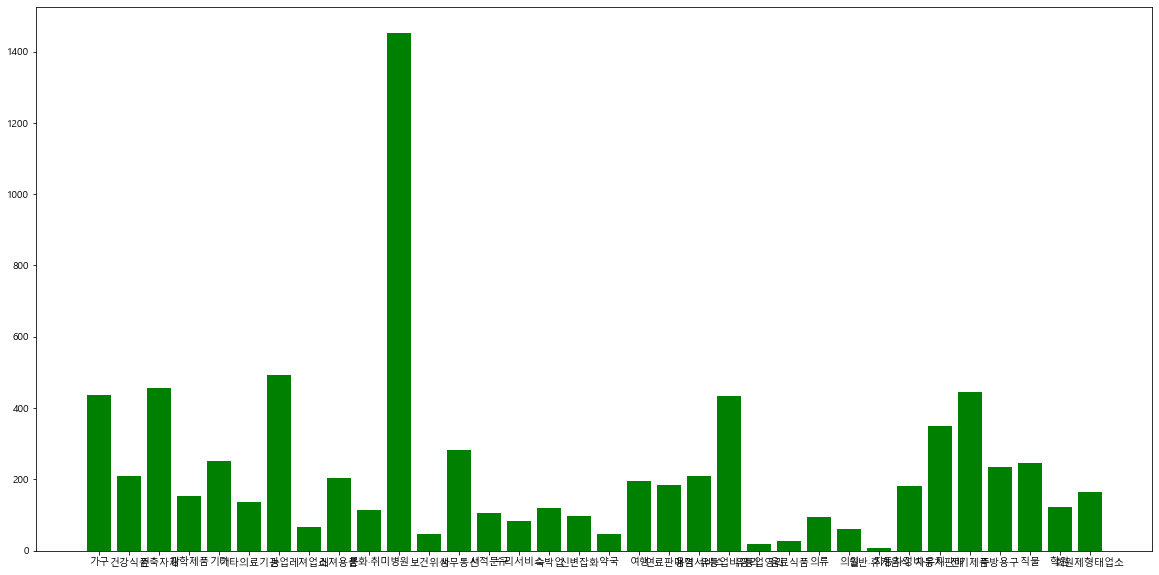

In [113]:
plt.figure(figsize = (20, 10))
plt.bar(group_concat.index, group_concat['증감율'], color = 'green')
plt.show()

In [66]:
np.arange(len(group_concat)/2)[1]

1.0

In [68]:
# 한 창에 모두 나열하기에는 x축이 너무 길어서 반으로 자름.
group_concat_1 = group_concat.iloc[[int(i) for i in np.arange(len(group_concat)/2)]]
group_concat_2 = group_concat.iloc[[len(group_concat)/2 + int(i) for i in np.arange(len(group_concat)/2)]]
print(len(group_concat), len(group_concat_1), len(group_concat_2))
len(group_concat) == len(group_concat_1) + len(group_concat_2)

34 17 17


True

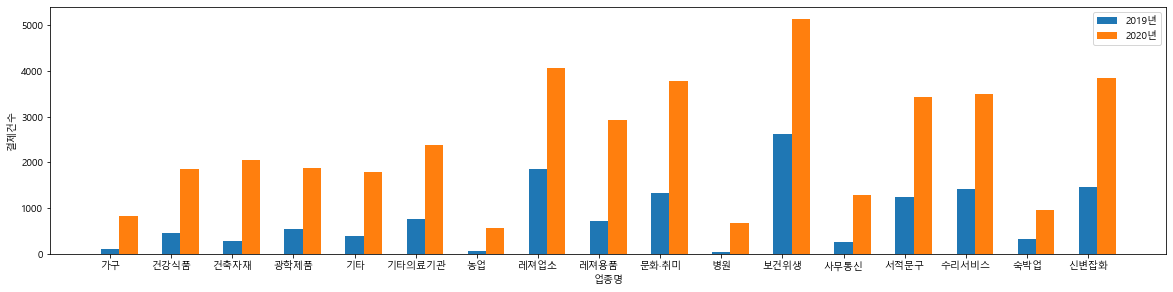

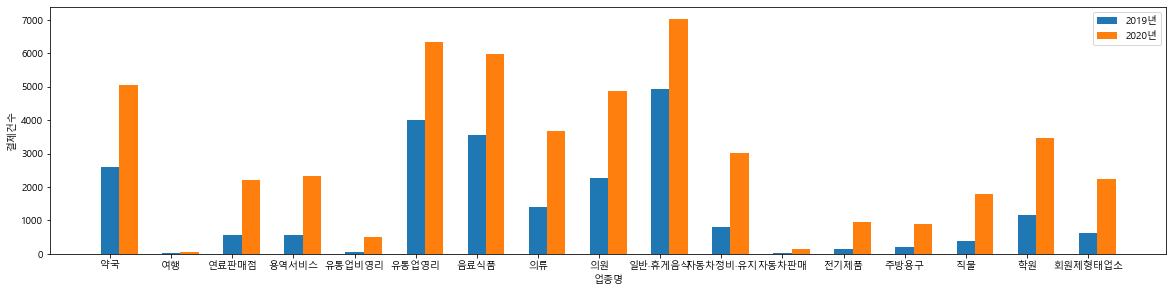

In [93]:
%matplotlib inline
plt.figure(figsize = (20, 10))
plt.subplot(2, 1, 1)

labels= group_concat_1.index
index = pd.Series(np.arange(len(labels)))
p1 = plt.bar(index, group_concat_1['2019년 결제건수'],width=0.3)
p2 = plt.bar(index+0.3,group_concat_1['2020년 결제건수'],width=0.3)
plt.xticks(index,labels)
plt.xlabel("업종명")
plt.ylabel("결제건수")
plt.legend(['2019년','2020년'])
plt.show()

plt.figure(figsize = (20, 10))
plt.subplot(2,1,2)

labels= group_concat_2.index
index = pd.Series(np.arange(len(labels)))
p1 = plt.bar(index, group_concat_2['2019년 결제건수'],width=0.3)
p2 = plt.bar(index+0.3,group_concat_2['2020년 결제건수'],width=0.3)
plt.xticks(index,labels)
plt.xlabel("업종명")
plt.ylabel("결제건수")
plt.legend(['2019년','2020년'])
plt.show()

### 기준년월을 활용하여 분기별로 분석

In [94]:
df.sort_values(by = '기준년월')

,기준년월,시군구명,읍면동명,성별,연령대,업종명,결제건수,결제금액,건당 평균결제금액
128649,201904,팔달구,화서동,여,60대이상,일반·휴게음식,6,81500,13583.33
127626,201904,영통구,영통동,남,30대,사무통신,2,6540,3270.00
127627,201904,영통구,영통동,남,30대,서적문구,3,18050,6016.67
127628,201904,영통구,영통동,남,30대,수리서비스,2,54230,27115.00
127629,201904,영통구,영통동,남,30대,약국,7,34330,4904.29
...,...,...,...,...,...,...,...,...,...
6190,202011,장안구,파장동,여,20대,자동차정비·유지,2,200000,100000.00
6189,202011,장안구,파장동,여,20대,일반·휴게음식,455,6364500,13987.91
6188,202011,장안구,파장동,여,20대,의원,21,556900,26519.05
6168,202011,장안구,파장동,여,10대,의류,3,27000,9000.00


In [95]:
data_20=df.loc[(df.기준년월 >= 202001) & (df.기준년월 <=202012)]
data_19=df.loc[(df.기준년월 >= 201901) & (df.기준년월 <=201912)]
# 데이터가 빠짐없이 나눠졌는지 확인하기 위해 기존 df 크기와 비교
len(data_20) + len(data_19) == len(df)

True

In [96]:
# 년도별 분기 divide
data_20_1=df.loc[(df.기준년월 >= 202001) & (df.기준년월 <=202003)]
data_20_2=df.loc[(df.기준년월 >= 202004) & (df.기준년월 <=202006)]
data_20_3=df.loc[(df.기준년월 >= 202007) & (df.기준년월 <=202009)]
data_20_4=df.loc[(df.기준년월 >= 202010) & (df.기준년월 <=202012)]

data_19_1=df.loc[(df.기준년월 >= 201901) & (df.기준년월 <=201903)] # 없음
data_19_2=df.loc[(df.기준년월 >= 201904) & (df.기준년월 <=201906)]
data_19_3=df.loc[(df.기준년월 >= 201907) & (df.기준년월 <=201909)]
data_19_4=df.loc[(df.기준년월 >= 201910) & (df.기준년월 <=201912)]

In [97]:
_20_1=round(data_20_1['결제금액'].mean(),2)
_20_2=round(data_20_2['결제금액'].mean(),2)
_20_3=round(data_20_3['결제금액'].mean(),2)
_20_4=round(data_20_4['결제금액'].mean(),2)

# 19년도 1분기 데이터 존재하지 않음
# _19_1=round(data_19_1['결제금액'].mean(),2)
_19_2=round(data_19_2['결제금액'].mean(),2)
_19_3=round(data_19_3['결제금액'].mean(),2)
_19_4=round(data_19_4['결제금액'].mean(),2)

### 년도별 분기당 남녀평균결제금액 비교

In [98]:
# round map에 쓰기 위한 def
def round_2(x):
    return round(x,2)

#년도별 분기당 남녀평균결제금액 비교 def
def feature_semester(year, semester, semester_list):
    year=str(year)[-2:]
    semester=str(semester)[0:1]
    man=semester_list[semester_list.성별 == '남']['결제금액'].mean()
    woman=semester_list[semester_list.성별 == '여']['결제금액'].mean()
    df=pd.DataFrame({'성별':list(map(round_2,[man,woman]))})
    df.index = ['남자','여자']
    df.plot(kind='bar',stacked=True, figsize=(10,5), color='pink', alpha=0.7)
    plt.xticks(color = 'y')
    plt.yticks(color = 'y')
    plt.legend(['성별 평균결제금액'])
    plt.xlabel(year+'년도 '+semester+'분기',color = 'y', fontsize=15)
    plt.ylabel('평균 결제 금액',color = 'y', fontsize=15)

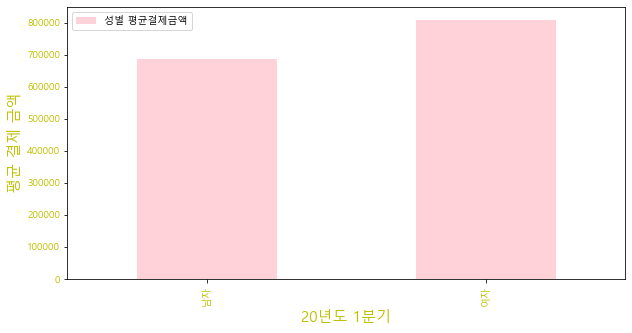

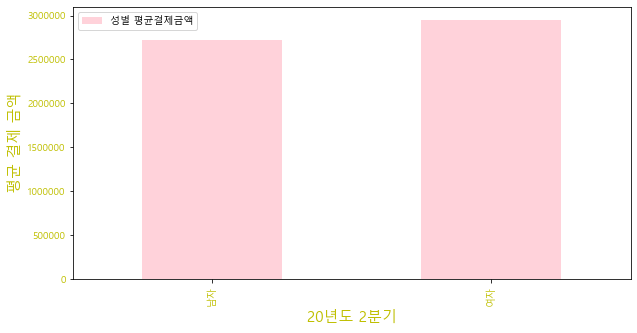

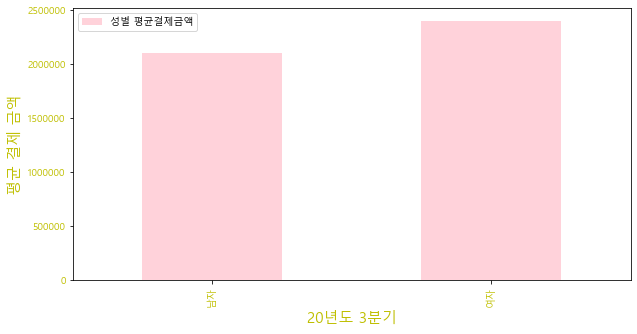

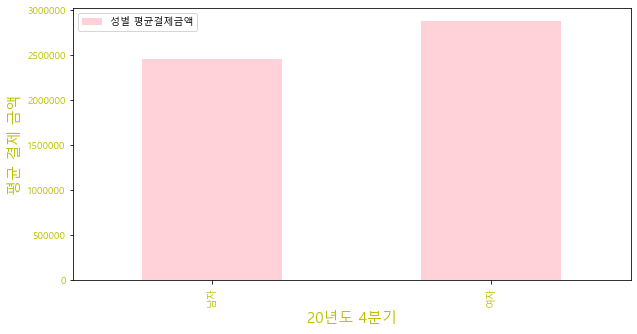

In [99]:
feature_semester(20, 1, data_20_1)
feature_semester(20, 2, data_20_2)
feature_semester(20, 3, data_20_3)
feature_semester(20, 4, data_20_4)

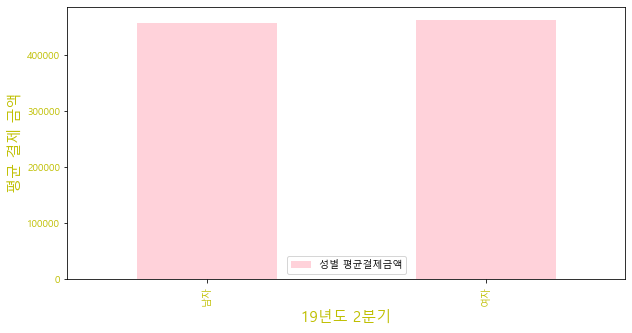

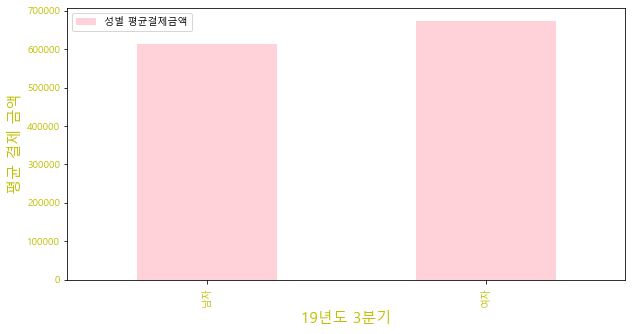

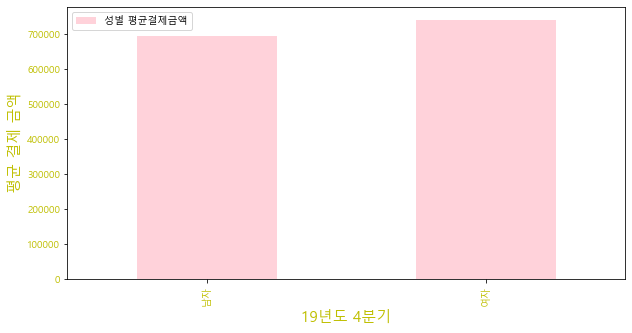

In [100]:
# feature_semester(19, 1, data_19_1)
# 19년 1분기 없으므로 제외
feature_semester(19, 2, data_19_2)
feature_semester(19, 3, data_19_3)
feature_semester(19, 4, data_19_4)

In [101]:
# 분기별 평균결제금액 비교 def
def pay_mean_semester(year, semester_list):
    year=str(year)[-2:]
    semester_list.index=[year+'년도 1분기',year+'년도 2분기',year+'년도 3분기',year+'년도 4분기']
    semester_list.plot(kind='bar',stacked=True, figsize=(10,5), color='pink', alpha=0.7)
    plt.xticks(color = 'y')
    plt.yticks(color = 'y')
    plt.legend(['분기당 평균결제금액'])
    plt.xlabel(year+'년도 분기',color = 'y', fontsize=15)
    plt.ylabel('평균 결제 금액',color = 'y', fontsize=15)

In [102]:
# 2020년도 분기별 평균결제금액 divide
q=data_20.loc[(df.기준년월 >= 202001) & (df.기준년월 <= 202003)]['결제금액'].mean()
w=data_20.loc[(df.기준년월 >= 202004) & (df.기준년월 <= 202006)]['결제금액'].mean()
e=data_20.loc[(df.기준년월 >= 202007) & (df.기준년월 <= 202009)]['결제금액'].mean()
r=data_20.loc[(df.기준년월 >= 202010) & (df.기준년월 <= 202012)]['결제금액'].mean()

# df로 구성
df_1=pd.DataFrame({'평균결제금액':list(map(round_2,[q,w,e,r]))})

### 20년도 평균결제금액 그래프


아래 20년도 분기별 평균결제금액을 보면,

1분기에 비해 2,3,4분기가 훨씬 높으며 2분기가 가장 높은 평균결제금액

=> 이유
* 정부 긴급재난지원기금(1차): 4/29 결정 -> 5/11~18 배포. 사용기한: 8/31
    + 지역사랑상품권/ 지역화폐로 신청 가능. 수원시 수원페이로 신청 가능
* 경기도 재난기본소득(1차): 4/9부터 신청. 사용기한: 8/31
    + 지역화폐로 신청가능. 수원페이.

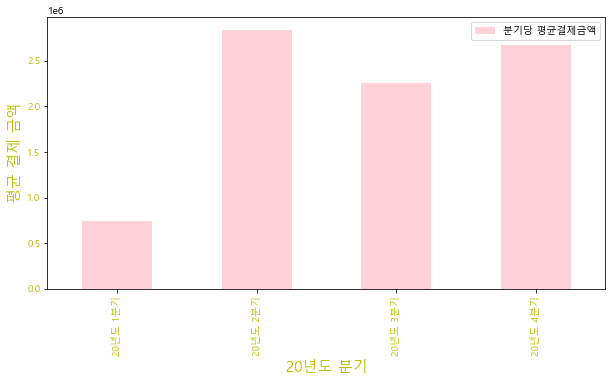

In [47]:
pay_mean_semester(20, df_1)

In [48]:
# 2020년도 분기별 평균결제금액 divide
q=data_19.loc[(df.기준년월 >= 201901) & (df.기준년월 <=201903)]['결제금액'].mean()
w=data_19.loc[(df.기준년월 >= 201904) & (df.기준년월 <=201906)]['결제금액'].mean()
e=data_19.loc[(df.기준년월 >= 201907) & (df.기준년월 <=201909)]['결제금액'].mean()
# r=data_19.loc[(df.기준년월 >= 201910) & (df.기준년월 <=201912)]['결제금액'].mean()
# 20년도가 11월까지이므로 11월까지 데이터 입력
r=data_19.loc[(df.기준년월 >= 201910) & (df.기준년월 <=201911)]['결제금액'].mean()

# df로 구성
df_2=pd.DataFrame({'평균결제금액':list(map(round_2,[q,w,e,r]))})

### 19년도 평균결제금액 그래프


아래 19년도 분기별 평균결제금액을 보면,

1분기는 데이터가 없어 그래프가 나타나지 않는다.(수원페이 19년 4월 출시)

2,3,4분기는 지속적으로 평균결제금액이 상승했다.

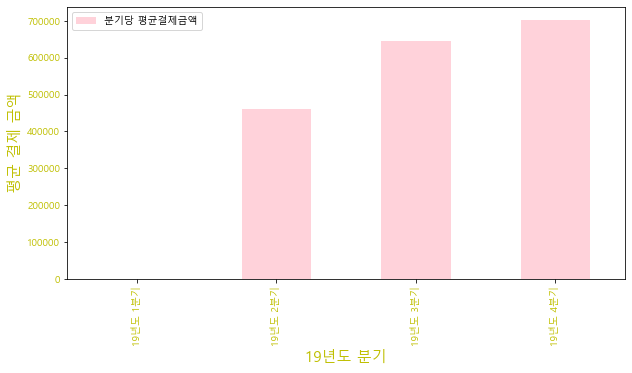

In [49]:
pay_mean_semester(19, df_2)

### 20년도 vs 19년도

- 20년도는 2분기에 가장 높은 반면, 19년도 2분기는 가장 낮은 수치 기록
- 평균결제금액 흐름이 다른 이유..?


+ 19년 2분기: 수원페이 발행 시작
+ 코로나 재난지원금(정부, 경기도) 지급~사용시기로 결제가 몰렸음.

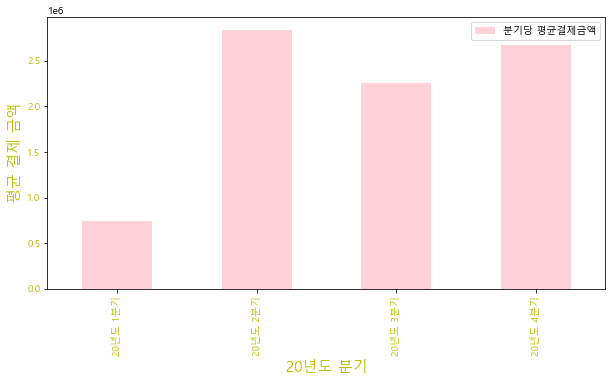

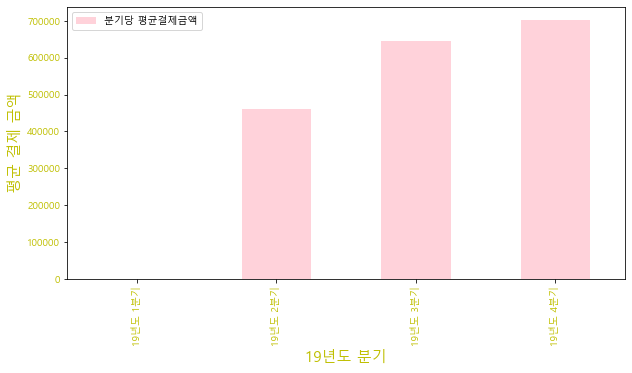

In [50]:
pay_mean_semester(20, df_1)
pay_mean_semester(19, df_2)

In [51]:
# 2019 데이터가 4월부터 12월까지, 2020 데이터가 1월부터 11월까지이므로
# 두 데이터를 4월부터 11월로 맞춰준다.
temp_2020=df.loc[(df['기준년월']) >= 202004]
temp_2019=df.loc[(df['기준년월']) <= 201911]

temp_2020.loc[:,'기준년월'] = 2020
temp_2019.loc[:,'기준년월'] = 2019

temp=pd.concat([temp_2020,temp_2019])

C:\Users\sihyun\anaconda3\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [52]:
# df.rename(columns = {'건당 평균결제금액' : '건당_평균결제금액'}, inplace = True)
temp.rename(columns = {'건당 평균결제금액' : '건당_평균결제금액'}, inplace = True)

### year_pay_mean1, year_pay_mean2 함수 비교
- year_pay_mean1은 평균결제금액으로 평균을 낸 def고,
- year_pay_mean2은 건당_평균결제금액으로 평균을 낸 def
- year_pay_mean1이 타당한 계산이긴 함..

In [60]:
def year_pay_mean1(temp):
    temp=pd.DataFrame(round_2(temp.groupby('기준년월').건당_평균결제금액.mean()))
    temp.index=[str(temp.index[0])+'년도',str(temp.index[1])+'년도']
    temp.plot(kind='bar',stacked=True, figsize=(10,5), color='pink', alpha=0.7)
    plt.xticks(color = 'y')
    plt.yticks(color = 'y')
    plt.xlabel('년도',color = 'y', fontsize=15)
    plt.ylabel('평균 결제 금액',color = 'y', fontsize=15)

In [61]:
def year_pay_mean2(temp):
    temp=pd.DataFrame(round_2(temp.groupby('기준년월').건당_평균결제금액.mean()))
    temp.index=[str(temp.index[0])+'년도',str(temp.index[1])+'년도']
    temp.plot(kind='bar',stacked=True, figsize=(10,5), color='pink', alpha=0.7)
    plt.xticks(color = 'y')
    plt.yticks(color = 'y')
    plt.xlabel('년도',color = 'y', fontsize=15)
    plt.ylabel('평균 결제 금액',color = 'y', fontsize=15)

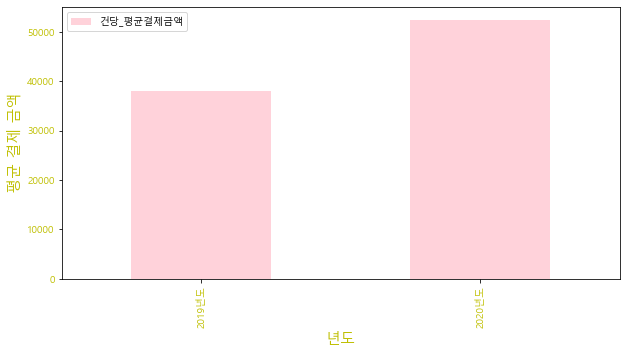

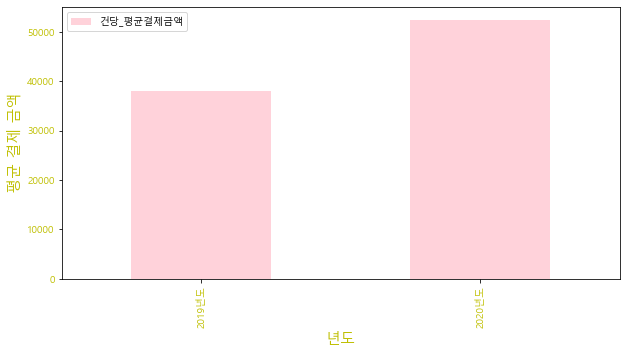

In [62]:
# 비교
year_pay_mean1(temp)
year_pay_mean2(temp)

### 연도별, 연령별 결제건수

In [56]:
groupage_2019 = df_2019.groupby('연령대', as_index = False).count()[['결제건수']]
groupage_2020 = df_2020.groupby('연령대', as_index = False).count()[['결제건수']]

group_concat = pd.concat([groupage_2019, groupage_2020], axis = 1)
group_concat.columns = ['2019년 결제건수', '2020년 결제건수']

In [57]:
group_concat['증감율'] = (group_concat['2020년 결제건수']/4 - group_concat['2019년 결제건수']/3)/(group_concat['2019년 결제건수']/3)* 100
groupage = group_concat

g1 = list(groupage['2019년 결제건수'])
g2 = list(groupage['2020년 결제건수'])

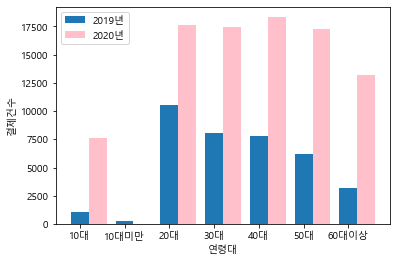

In [58]:
labels=['10대','10대미만','20대','30대','40대','50대','60대이상']
index = pd.Series(np.arange(len(labels)))
p1 = plt.bar(index,g1,width=0.4)
p2 = plt.bar(index+0.4,g2,color='pink',width=0.4)
plt.xticks(index,labels)
plt.xlabel("연령대")
plt.ylabel("결제건수")
plt.legend(['2019년','2020년'])
plt.show()

### 연도별, 연령별 건당 평균결제금액

In [74]:
groupage_2019 = df_2019.groupby('연령대', as_index = False).mean()[['건당 평균결제금액']]/1000
groupage_2020 = df_2020.groupby('연령대', as_index = False).mean()[['건당 평균결제금액']]/1000

group_concat = pd.concat([groupage_2019, groupage_2020], axis = 1)
group_concat.columns = ['2019년 건당_평균결제금액', '2020년 건당_평균결제금액']
group_concat

,2019년 건당_평균결제금액,2020년 건당_평균결제금액
0,22.271658,39.254394
1,24.803169,9.812750
2,37.136804,47.987598
3,49.028297,61.240190
4,42.682618,57.035915
5,33.366488,48.985303
6,27.823967,40.436131


In [75]:
group_concat['증감율'] = (group_concat['2020년 건당_평균결제금액']/4 - group_concat['2019년 건당_평균결제금액']/3)/(group_concat['2019년 건당_평균결제금액']/3)* 100
groupage = group_concat

g1 = list(groupage['2019년 건당_평균결제금액'])
g2 = list(groupage['2020년 건당_평균결제금액'])

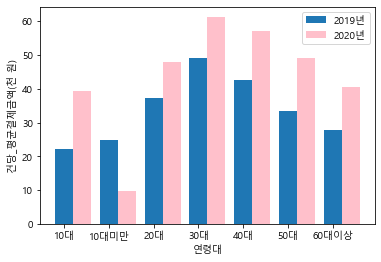

In [77]:
labels=['10대','10대미만','20대','30대','40대','50대','60대이상']
index = pd.Series(np.arange(len(labels)))
p1 = plt.bar(index,g1,width=0.4)
p2 = plt.bar(index+0.4,g2,color='pink',width=0.4)
plt.xticks(index,labels)
plt.xlabel("연령대")
plt.ylabel("건당_평균결제금액(천 원)")
plt.legend(['2019년','2020년'])
plt.show()

- 10대미만을 제외하고, 결제건수와 건당 평균 결제금액은 크게 상승하였음.
- 즉, 코로나 전과 후로 나뉘는 2019년과 2020년에서 결제건수와 결제금액은 극명히 달라졌음
- 한 건당 평균 결제금액 또한 크게 상승하였는데, 이는 재난지원금으로 인한 사치재 소비 견인효과로 해석됨.